## Turtle Games Analysis

1. How customers accumulate loyalty points
2. How groups within the customer base can be used to target specific market segments
3. How social data can be used to inform marketing campaigns
4. The impact of each product on sales 
5. The reliability of the data
6. The relationships of the sales data (NA, EU and Global)

## Week 1

### 1. Import Python Libraries

In [1]:
# Import all the necessary packages.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt

from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

import warnings  
warnings.filterwarnings('ignore')  

### 2. Import the data set

In [2]:
# Import the data set.
df_reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
df_reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [5]:
# View the metadata.
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


### 3. Data cleaning

In [3]:
df_reviews_na = df_reviews[df_reviews.isna().any(axis=1)]

df_reviews_na.shape

#the result indicates that there are no rows with NaN in 11 columns

(0, 11)

In [4]:
#Remove the redundant columns language and platform
df_reviews_1 = df_reviews.drop(columns = ['language','platform'])
df_reviews_1.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [5]:
#change the column headings to names that are easier to reference 
df_reviews_2 = df_reviews_1.rename(columns = {"remuneration (k£)": "remuneration","spending_score (1-100)":"spending_score"})
df_reviews_2.head()

#df_reviews_2 to be saved as a clean csv file

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


### 4. Simple Linear Regression

#### 1) Simple Linear Regression - age and loyalty points

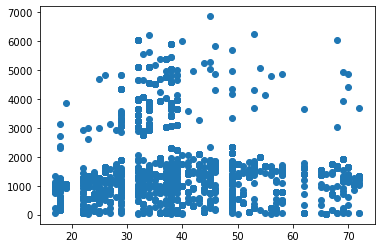

In [6]:
# Define the dependent variable
y = df_reviews_2 ['loyalty_points']

# Define the independent variable 1 
x_1 = df_reviews_2 ['age']

# Check for linearity with Matplotlib
plt.scatter(x_1,y)

In [7]:
#Create formula and pass through OLS methods

f = 'y ~ x_1'
test = ols(f, data = df_reviews_2).fit()

# Print the regression table
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Tue, 27 Jun 2023   Prob (F-statistic):             0.0577
Time:                        18:07:07   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x_1           -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    1736.517739
x_1            -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x_1           2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [34]:
#Create the linear regression model. 
y_pred = 1736.517739 + (-4.012805)*df_reviews_2['age']

#View the output
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

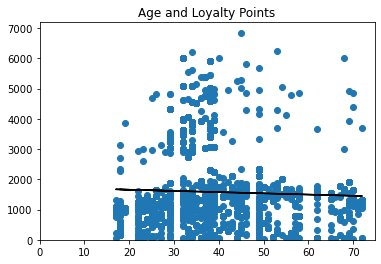

In [38]:
# Plot the data points with a scatterplot
plt.scatter (x_1, y)

# Plot the regression line in black
plt.plot(x_1, y_pred, color = 'black')

# Set the x and y limits on the axes
plt.xlim(0)
plt.ylim(0)
plt.title ("Age and Loyalty Points")

# View the plot
plt.show()

#### 2) Simple Linear Regression - Remuneration and Loyalty Points

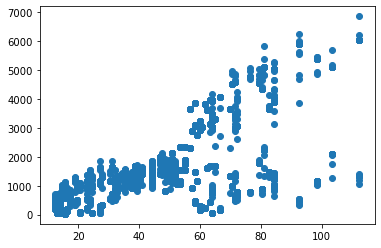

In [12]:
# Define the dependent variable
y = df_reviews_2 ['loyalty_points']

# Define the independent variable 1 
x_2 = df_reviews_2 ['remuneration']

# Check for linearity with Matplotlib
plt.scatter(x_2,y)

In [13]:
#Create formula and pass through OLS methods

f = 'y ~ x_2'
test = ols(f, data = df_reviews_2).fit()

# Print the regression table
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          2.43e-209
Time:                        18:10:11   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x_2           34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -65.686513
x_2          34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x_2           0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [41]:
#Create the linear regression model. 
y_pred = (-65.686513) + (34.187825)*df_reviews_2['remuneration']

#View the output
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

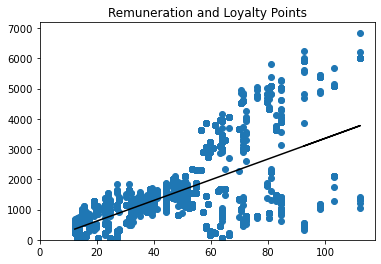

In [44]:
# Plot the data points with a scatterplot
plt.scatter (x_2, y)

# Plot the regression line in black
plt.plot(x_2, y_pred, color = 'black')

# Set the x and y limits on the axes
plt.xlim(0)
plt.ylim(0)
plt.title ("Remuneration and Loyalty Points")

# View the plot
plt.show()

#### 3) Simple Linear Regression - Spending Score

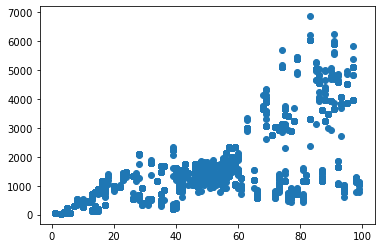

In [17]:
# Define the dependent variable
y = df_reviews_2 ['loyalty_points']

# Define the independent variable 1 
x_3 = df_reviews_2 ['spending_score']

# Check for linearity with Matplotlib
plt.scatter(x_3,y)

In [18]:
#Create formula and pass through OLS methods

f = 'y ~ x_3'
test = ols(f, data = df_reviews_2).fit()

# Print the regression table
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          2.92e-263
Time:                        18:10:27   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x_3           33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -75.052663
x_3          33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x_3           0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [45]:
#Create the linear regression model. 
y_pred = (-75.052663) + (33.061693)*df_reviews_2['spending_score']

#View the output
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

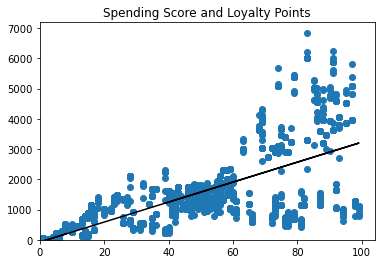

In [47]:
# Plot the data points with a scatterplot
plt.scatter (x_3, y)

# Plot the regression line in black
plt.plot(x_3, y_pred, color = 'black')

# Set the x and y limits on the axes
plt.xlim(0)
plt.ylim(0)
plt.title ("Spending Score and Loyalty Points")

# View the plot
plt.show()

## Week 2

In [51]:
df2 = df_reviews_2.drop(columns=['review','summary'])

df2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product
0,Male,18,12.30,39,210,graduate,453
1,Male,23,12.30,81,524,graduate,466
2,Female,22,13.12,6,40,graduate,254
3,Female,25,13.12,77,562,graduate,263
4,Female,33,13.94,40,366,graduate,291


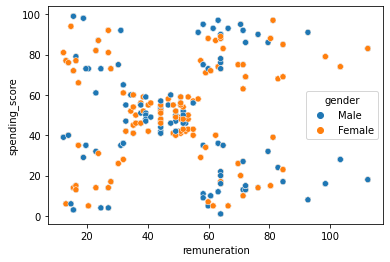

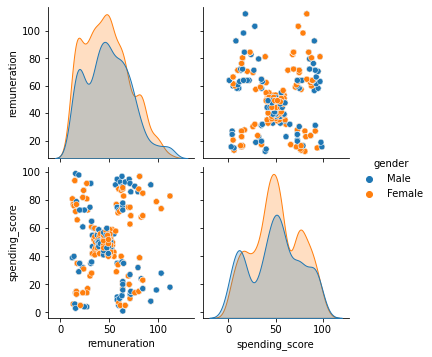

In [52]:
#import Seaborn and Matplotlib

from matplotlib import pyplot as plt
import seaborn as sns

#Create a scatterplot with Seaborn. 
sns.scatterplot (x='remuneration',
                 y='spending_score',
                 hue = 'gender',
                 data = df2)

#Create a pairplot with Seaborn
x = df2[['remuneration','spending_score']]

sns.pairplot(df2,
             vars = x,
             hue ='gender',
             diag_kind = 'kde')


## 1. Use the Elbow and Silhouette methods to determine the optimal number of clusters for k-means clustering

### 1) Elbow Method

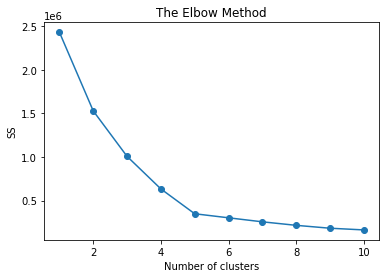

In [53]:
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

### 2) Silhoutte Method

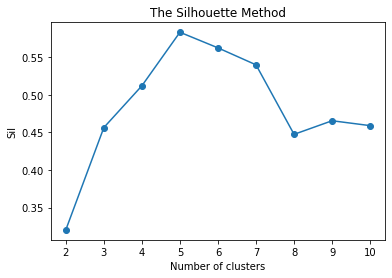

In [54]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 2. Evaluate the usefulness of at least three values of K

### 1) K = 5

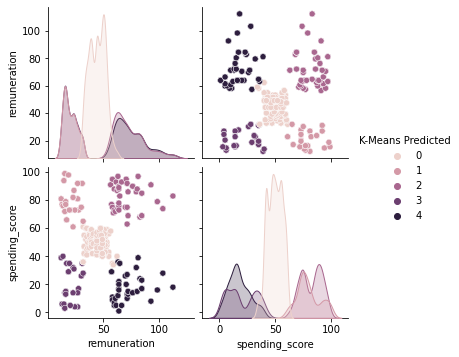

In [55]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [56]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

In [65]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  4
2         13.12               6                  3
3         13.12              77                  4
4         13.94              40                  3


### 2) K = 4

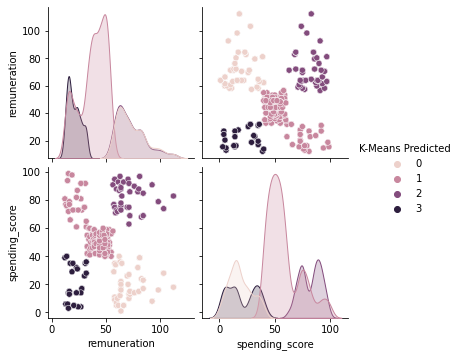

In [58]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [59]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    1013
2     356
0     351
3     280
Name: K-Means Predicted, dtype: int64

### 3) K = 6

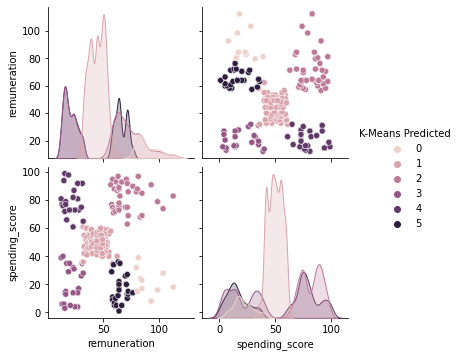

In [60]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [61]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    767
2    356
3    271
4    269
5    214
0    123
Name: K-Means Predicted, dtype: int64

## Week 3

In [69]:
df_reviews_2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [70]:
df_nlp= df_reviews_2.drop(columns = ['gender','age','remuneration','spending_score','loyalty_points','education','product'])
df_nlp.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [71]:
# Determine the number of rows where the comments are not populated
df_nlp['review'].isna().sum()

0

In [72]:
# Determine the number of rows where the comments are not populated
df_nlp['summary'].isna().sum()

0

## 1. Prepare the data for NLP

In [73]:
# Transform data to lowercase.
df_nlp['review'] = df_nlp['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#the split function split the data into words

# Preview the result.
df_nlp['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [74]:
# Transform data to lowercase.
df_nlp['summary'] = df_nlp['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#the split function split the data into words

# Preview the result.
df_nlp['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [75]:
#check if lower case has been applied to both columns
df_nlp.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


In [76]:
# Remove punctuation.
df_nlp['review'] = df_nlp['review'].str.replace('[^\w\s]','')

# Preview the result.
df_nlp['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [77]:
# Remove punctuation.
df_nlp['summary'] = df_nlp['summary'].str.replace('[^\w\s]','')

# Preview the result.
df_nlp['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [78]:
# Check the number of duplicate values in the summary column.
df_nlp.summary.duplicated().sum()

649

In [79]:
# Check the number of duplicate values in the review column.
df_nlp.review.duplicated().sum()

50

In [80]:
# Drop duplicates.
#Remove the duplicates of the comments column
df_nlp_1= df_nlp.drop_duplicates(subset=['review','summary'])

# Preview data
df_nlp_1.reset_index(inplace=True)
df_nlp_1.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [81]:
# String all the comments together in a single variable.
# Create an empty string variable.
all_comments = ''
for i in range(df_nlp_1.shape[0]):
    # Add each comment.
    all_comments = all_comments + df_nlp_1['review'][i] + df_nlp_1['summary'][i]

In [82]:
# Import necessary libraries.
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## 2. wordcloud

In [83]:
# You might need to install WordCloud.
!pip install WordCloud

In [84]:
# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

In [85]:
pip install --upgrade pillow

Note: you may need to restart the kernel to use updated packages.


In [86]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [87]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size=10).generate(all_comments)

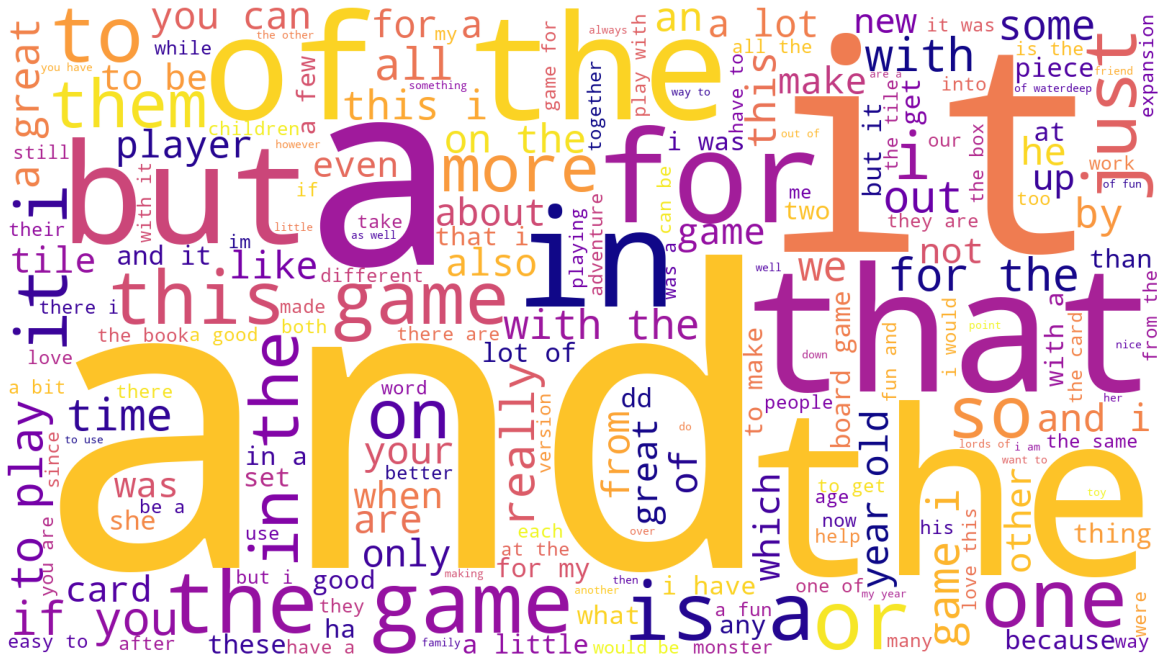

In [88]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly from the one provided.

4.Tokenise and create word clouds for the respective columns

In [89]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /Users/erxu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [90]:
# Tokenise the words.
df_nlp['tokens_1'] = df_nlp['review'].apply(word_tokenize)

# Preview data.
df_nlp['tokens_1'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens_1, dtype: object

In [91]:
# Tokenise the words.
df_nlp['tokens_2'] = df_nlp['summary'].apply(word_tokenize)

# Preview data.
df_nlp['tokens_2'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens_2, dtype: object

In [92]:
# Define an empty list of tokens.
all_tokens = []

for i in range(df_nlp.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + df_nlp['tokens_1'][i] + df_nlp['tokens_2'][i]

In [93]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'the': 5713, 'and': 3402, 'a': 3401, 'to': 3356, 'of': 2627, 'it': 2240, 'i': 2177, 'game': 2004, 'this': 1911, 'is': 1885, ...})

In [94]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens = [word for word in all_tokens if word.isalnum()]

### Eliminate stop words

In [95]:
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to /Users/erxu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


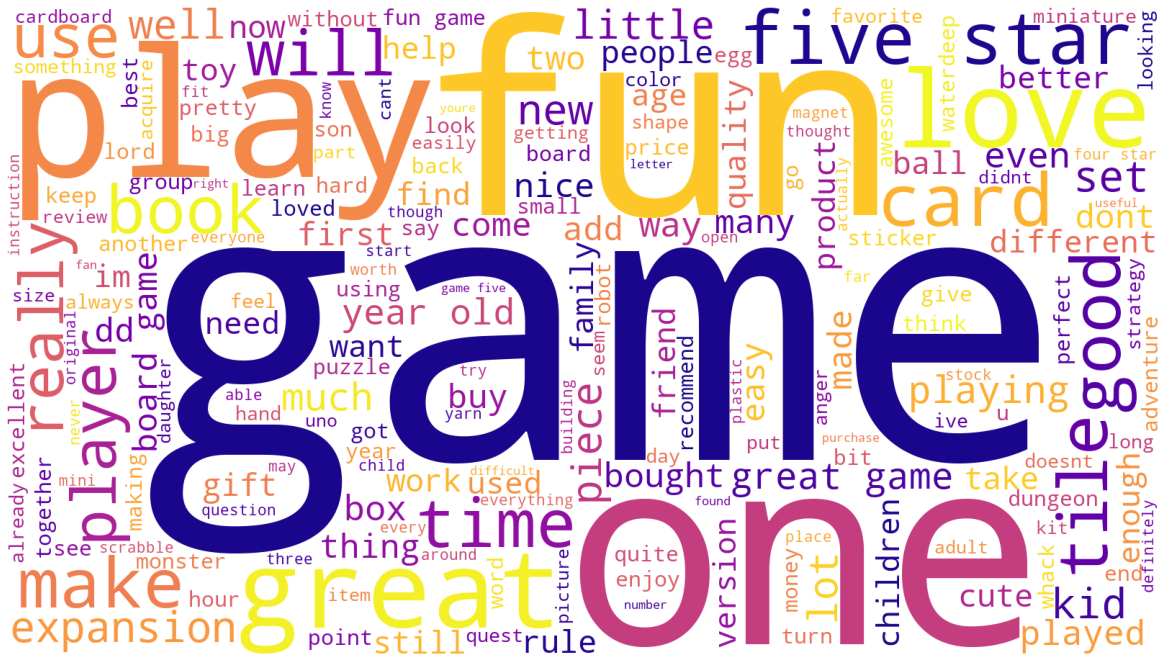

In [96]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly to the one provided.

### frequency distribution

In [97]:
# View the frequency distribution.
fdist1 = FreqDist(tokens2)

# Preview the data.
fdist1

FreqDist({'game': 2004, 'great': 891, 'fun': 771, 'one': 568, 'play': 528, 'stars': 503, 'like': 468, 'love': 424, 'five': 401, 'good': 386, ...})

In [98]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
game,2004
great,891
fun,771
one,568
play,528
stars,503
like,468
love,424
five,401


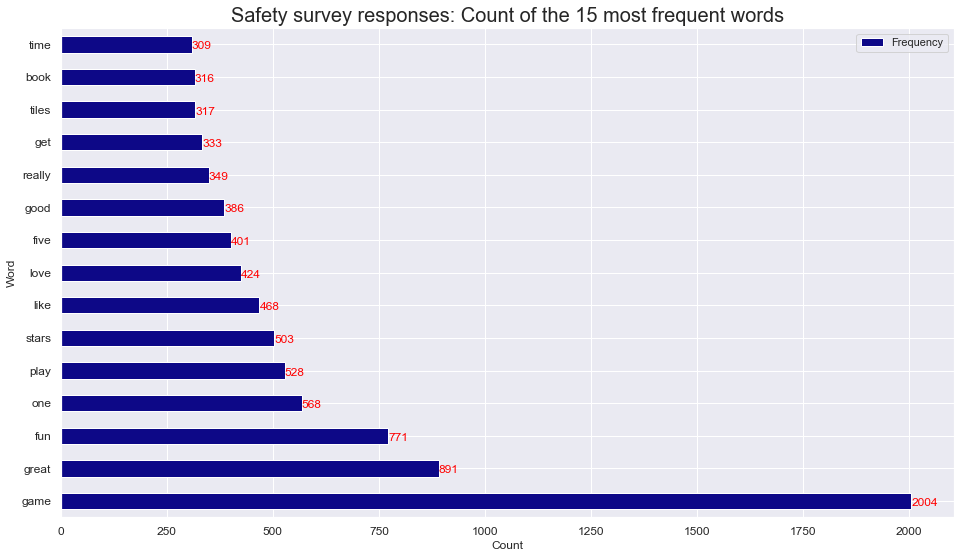

In [99]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Safety survey responses: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

### Pre-processing comments

In [100]:
df_nlp_2 = df_nlp['summary'].values

In [101]:
df_nlp_3 = df_nlp['review'].values

In [102]:
# Import nltk and the required resources.
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words

nltk.download('stopwords')
nltk.download('words')
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/erxu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/erxu/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [103]:
# The results will change every time the code is executed. Let's review the first 15.

# Print the first 15 comments without stop words
for i in range(15):
    print(i)
    print(df_nlp_2[i])

0
the fact that 50 of this space is wasted on art and not terribly informative or needed art 
1
another worthless dungeon masters screen from galeforce9
2
pretty but also pretty useless
3
five stars
4
money trap
5
five stars
6
best gm screen ever
7
five stars
8
great but could be even better
9
another missed opportunity not a value add to the product line
10
five stars
11
love the map
12
not a general dm screen
13
very weak game
14
fell completely flat


In [104]:
# Look at one comment
# Based on the results of the previous cell, select a comment in English that contains keywords suitable for text analysis

# Set the index of the comment to be returned
tid = 5
df_nlp_2[tid]

'five stars'

In [105]:
# Split up each comment into individual words
df_nlp_4 = [word_tokenize(_) for _ in df_nlp_2]

# View results.
df_nlp_4

[['the',
  'fact',
  'that',
  '50',
  'of',
  'this',
  'space',
  'is',
  'wasted',
  'on',
  'art',
  'and',
  'not',
  'terribly',
  'informative',
  'or',
  'needed',
  'art'],
 ['another',
  'worthless',
  'dungeon',
  'masters',
  'screen',
  'from',
  'galeforce9'],
 ['pretty', 'but', 'also', 'pretty', 'useless'],
 ['five', 'stars'],
 ['money', 'trap'],
 ['five', 'stars'],
 ['best', 'gm', 'screen', 'ever'],
 ['five', 'stars'],
 ['great', 'but', 'could', 'be', 'even', 'better'],
 ['another',
  'missed',
  'opportunity',
  'not',
  'a',
  'value',
  'add',
  'to',
  'the',
  'product',
  'line'],
 ['five', 'stars'],
 ['love', 'the', 'map'],
 ['not', 'a', 'general', 'dm', 'screen'],
 ['very', 'weak', 'game'],
 ['fell', 'completely', 'flat'],
 ['five', 'stars'],
 ['good', 'book'],
 ['buckley', 'was', 'a', 'card', 'mommer'],
 ['very', 'advanced', 'but', 'as', 'good', 'as', 'it', 'gets'],
 ['you', 'better', 'know', 'what', 'youre', 'getting', 'into'],
 ['dont', 'bother'],
 ['the', 'w

In [106]:
# Get a list of all english words so we can exclude anything that doesn't appear on the list.
all_english_words = set(words.words())

# View results.
all_english_words

{'fenceress',
 'seldomness',
 'skeletomuscular',
 'wambling',
 'Pseudopeziza',
 'roral',
 'graith',
 'deadly',
 'stepmotherliness',
 'axoid',
 'planospore',
 'rubineous',
 'dialing',
 'oxyketone',
 'dishorner',
 'auchlet',
 'federationist',
 'nonalignment',
 'autointoxicant',
 'hippolite',
 'kinotannic',
 'discordful',
 'pessimistically',
 'sasani',
 'unendurably',
 'lobularly',
 'supervenient',
 'fluocerine',
 'untruthfully',
 'operationist',
 'odontoplast',
 'barrulet',
 'foredawn',
 'distinctify',
 'Iricism',
 'suppedaneum',
 'upcrop',
 'advanceable',
 'trichloroacetic',
 'Pimenta',
 'thoughtkin',
 'scratchification',
 'defiantly',
 'strawwalker',
 'enterolith',
 'surfacy',
 'climactically',
 'nonanesthetized',
 'Canchi',
 'cotyledonal',
 'Chelonidae',
 'silverwood',
 'discoloredness',
 'ollamh',
 'unshakable',
 'seignorize',
 'rhe',
 'vallary',
 'katydid',
 'overlength',
 'cretion',
 'androseme',
 'vestryman',
 'hydrologically',
 'substratospheric',
 'rufescent',
 'Sybarite',
 'din

In [107]:
# Some pre-processing:
#-- lets get every word
#-- lets convert it to lowercase
#-- only include if the word is alphanumeric and if it is in the list of English words, but is not a stopword.

df_nlp_5= [[y.lower() for y in x if y.lower() not in stop_words and y.isalpha() and y.lower() in all_english_words] for x in df_nlp_4]

In [108]:
# Let's have a look at the same comment as above.

df_nlp_5[tid]

['five']

process the data in column "review"

In [109]:
# The results will change every time the code is executed. Let's review the first 15.

# Print the first 15 comments without stop words
for i in range(15):
    print(i)
    print(df_nlp_3[i])

0
when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely
1
an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which cou

In [110]:
# Look at one comment
# Based on the results of the previous cell, select a comment in English that contains keywords suitable for text analysis

# Set the index of the comment to be returned
tid = 5
df_nlp_3[tid]

'grandson loves'

In [111]:
# Split up each comment into individual words
df_nlp_6 = [word_tokenize(_) for _ in df_nlp_3]

# View results.
df_nlp_6

[['when',
  'it',
  'comes',
  'to',
  'a',
  'dms',
  'screen',
  'the',
  'space',
  'on',
  'the',
  'screen',
  'itself',
  'is',
  'at',
  'an',
  'absolute',
  'premium',
  'the',
  'fact',
  'that',
  '50',
  'of',
  'this',
  'space',
  'is',
  'wasted',
  'on',
  'art',
  'and',
  'not',
  'terribly',
  'informative',
  'or',
  'needed',
  'art',
  'as',
  'well',
  'makes',
  'it',
  'completely',
  'useless',
  'the',
  'only',
  'reason',
  'that',
  'i',
  'gave',
  'it',
  '2',
  'stars',
  'and',
  'not',
  '1',
  'was',
  'that',
  'technically',
  'speaking',
  'it',
  'can',
  'at',
  'least',
  'still',
  'stand',
  'up',
  'to',
  'block',
  'your',
  'notes',
  'and',
  'dice',
  'rolls',
  'other',
  'than',
  'that',
  'it',
  'drops',
  'the',
  'ball',
  'completely'],
 ['an',
  'open',
  'letter',
  'to',
  'galeforce9',
  'your',
  'unpainted',
  'miniatures',
  'are',
  'very',
  'not',
  'bad',
  'your',
  'spell',
  'cards',
  'are',
  'great',
  'your',
 

In [90]:
# Get a list of all english words so we can exclude anything that doesn't appear on the list.
all_english_words = set(words.words())

# View results.
all_english_words

{'advisor',
 'nonsymptomatic',
 'berginization',
 'outpoison',
 'Borana',
 'intercentrum',
 'Psittacomorphae',
 'Italon',
 'aerobiotically',
 'legal',
 'rubidine',
 'borg',
 'Xenopteri',
 'Celtdom',
 'derailer',
 'floriculture',
 'freshish',
 'furthermore',
 'presbytery',
 'perfectibilism',
 'Seekerism',
 'sevenfold',
 'naumannite',
 'avigator',
 'Baya',
 'fishbone',
 'Mochica',
 'monumentalize',
 'lapidity',
 'scruff',
 'marmit',
 'indictably',
 'gurges',
 'Cofane',
 'sterilization',
 'stichometrically',
 'declivous',
 'underspecified',
 'uncunning',
 'lichenography',
 'outpour',
 'uroedema',
 'malagma',
 'herding',
 'inventory',
 'factory',
 'vandalroot',
 'micromillimeter',
 'unribbed',
 'woolwasher',
 'roading',
 'prechildhood',
 'redeliberate',
 'tensibility',
 'slaister',
 'spannerman',
 'diobely',
 'counterattestation',
 'tapsterlike',
 'cyanephidrosis',
 'cerotene',
 'foujdary',
 'unconsideringly',
 'uranium',
 'semidirect',
 'grooty',
 'thunder',
 'prefavorably',
 'polyoxide',

In [112]:
# Some pre-processing:
#-- lets get every word
#-- lets convert it to lowercase
#-- only include if the word is alphanumeric and if it is in the list of English words, but is not a stopword.

df_nlp_7= [[y.lower() for y in x if y.lower() not in stop_words and y.isalpha() and y.lower() in all_english_words] for x in df_nlp_6]

In [113]:
# Let's have a look at the same comment as above.

df_nlp_7[tid]

['grandson']

### Perform sentiment analysis

In [114]:
# import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/erxu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [115]:
# Import the vader class SentimentIntensityAnalyser.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable sia to store the SentimentIntensityAnalyser() method.
sia = SentimentIntensityAnalyzer()

#### 1) perform sentiment analysis for summary

In [116]:
# Run through a dictionary comprehension to take every cleaned comment
# Next run the polarity score function on the string.
# This will return four values in a dictionary

df_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df_nlp_5}

In [117]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned tweet.
# We can see some of the highly positive words. 
polarity = pd.DataFrame(df_polarity).T

# View the DataFrame.
polarity

,neg,neu,pos,compound
fact space wasted art terribly informative art,0.576,0.424,0.000,-0.7783
another worthless dungeon screen,0.492,0.508,0.000,-0.4404
pretty also pretty useless,0.275,0.098,0.627,0.5574
five,0.000,1.000,0.000,0.0000
money trap,0.697,0.303,0.000,-0.3182
...,...,...,...,...
fun card game people like,0.000,0.341,0.659,0.7003
sort card game equivalent scrabble lot easier,0.000,0.682,0.318,0.4215
great game keep mind active,0.000,0.306,0.694,0.7783
great mind game,0.000,0.328,0.672,0.6249


In [118]:
# With the non-aplhanumeric words (the emojis, handles, hashtags and stopwords) removed 
# some of the most positive words are single words

# Get the top 10 most positive cleaned 
polarity.sort_values('pos', ascending=0).head(10)

,neg,neu,pos,compound
fun,0.0,0.0,1.0,0.5106
delight,0.0,0.0,1.0,0.5994
excited,0.0,0.0,1.0,0.3400
happy gift,0.0,0.0,1.0,0.7650
easily,0.0,0.0,1.0,0.3400
love like,0.0,0.0,1.0,0.7717
entertaining,0.0,0.0,1.0,0.4404
gift,0.0,0.0,1.0,0.4404
yeah,0.0,0.0,1.0,0.2960
fun play,0.0,0.0,1.0,0.6908


In [119]:
# Get the top 10 most negative words
polarity.sort_values('neg', ascending=0).head(10)

,neg,neu,pos,compound
disappointed,1.000,0.000,0.0,-0.4767
defective poor,1.000,0.000,0.0,-0.7184
worn,1.000,0.000,0.0,-0.2960
bad,1.000,0.000,0.0,-0.5423
boring,1.000,0.000,0.0,-0.3182
disappointing,1.000,0.000,0.0,-0.4939
fight,1.000,0.000,0.0,-0.3818
angry,1.000,0.000,0.0,-0.5106
sided die,0.796,0.204,0.0,-0.5994
mad dragon,0.762,0.238,0.0,-0.4939


In [105]:
# The describe function on the compound will show the distribution and moments. 

polarity['compound'].describe()

count    1165.000000
mean        0.378276
std         0.343531
min        -0.784500
25%         0.000000
50%         0.493900
75%         0.624900
max         0.952400
Name: compound, dtype: float64

visualise the output for summary

<AxesSubplot:>

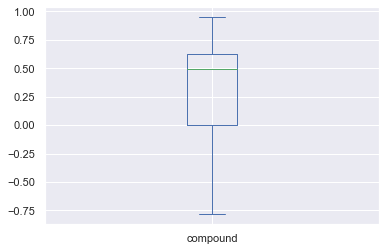

In [120]:
# Sometimes the best way to see is to plot. 
# In the data sampled here many of the values are 0
# There are less negative values than positive but the negative values are highly negative.

%matplotlib inline
import matplotlib.pyplot as plt

# The boxplot is a nice way to see how many values sit on the edges as outliers.
_plot = polarity.reset_index()['compound'].sort_values()
_plot.plot(kind='box')

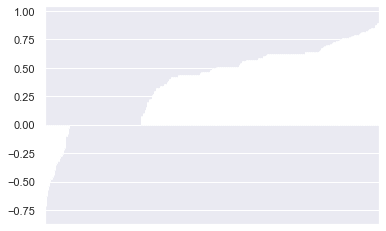

In [121]:
# Example of a barplot.
_plot = polarity.reset_index()['compound'].sort_values()
ax1 = plt.axes()
_plot.plot(kind='bar')

x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

plt.show()
plt.close()

array([[<AxesSubplot:title={'center':'compound'}>]], dtype=object)

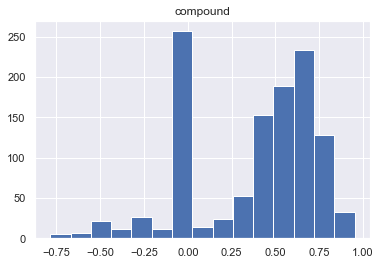

In [123]:
# create a histogram:
polarity['compound'].sort_values().reset_index().hist(bins=15)

#### 2) Sentiment analysis for the review column

In [124]:
# Run through a dictionary comprehension to take every cleaned comment
# Next run the polarity score function on the string.
# This will return four values in a dictionary

df_polarity_1 = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df_nlp_7}

In [125]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned tweet.
# We can see some of the highly positive words. 
polarity_1 = pd.DataFrame(df_polarity_1).T

# View the DataFrame.
polarity_1

,neg,neu,pos,compound
comes screen space screen absolute premium fact space wasted art terribly informative art well completely useless reason gave technically speaking least still stand block dice ball completely,0.347,0.596,0.057,-0.8932
open letter unpainted bad spell great board however terrible still waiting single screen polluted pointless useful tables youve single use screen useful running storm thunder adventure even despite fact geared adventure path usefulness negligible best massive swath inner panel wasted bloated overland map could easily reduced single panel size table short stop making crap,0.218,0.494,0.288,0.6908
nice art nice printing two filled general forgotten map beyond one blue ocean waste dont understand cant make useful rather solely specific adventure supposed able transpose adventure outside forgotten even list new would least useful map even would stuff related running game stuff related thing curse make useful raven loft undead horror general instead huge amount screen space solely castle useful small fraction time even curse adventure let alone various really kill extended use thinking potential use adventure question well use sense rage screen far useful broad dark covering lot various may suffer map one panel storm one decent tables really mark maybe ask would use,0.298,0.570,0.132,-0.9756
amazing buy bought gift new perfect,0.000,0.224,0.776,0.8860
review previous completely unnecessary nearly useless skip definition waste money,0.423,0.577,0.000,-0.7063
...,...,...,...,...
retired find great way stay alert spelling vocabulary also need use math keep score great game brain,0.000,0.574,0.426,0.8860
perfect word game mixed perhaps giving little help yr old love,0.000,0.355,0.645,0.9137
great game think would like first received turned lot fun play regularly order extra set always travel stuff,0.000,0.532,0.468,0.9062
great game mind nimble,0.000,0.423,0.577,0.6249


In [126]:
# With the non-aplhanumeric words (the emojis, handles, hashtags and stopwords) removed 
# some of the most positive words are single words

# Get the top 10 most positive cleaned 
polarity_1.sort_values('pos', ascending=0).head(10)

,neg,neu,pos,compound
fantastic,0.0,0.0,1.0,0.5574
fun enjoyable,0.0,0.0,1.0,0.7351
love,0.0,0.0,1.0,0.6369
easy,0.0,0.0,1.0,0.4404
perfect,0.0,0.0,1.0,0.5719
gift,0.0,0.0,1.0,0.4404
cute,0.0,0.0,1.0,0.4588
fun entertaining,0.0,0.0,1.0,0.7351
super fun,0.0,0.0,1.0,0.8020
awesome gift,0.0,0.0,1.0,0.7906


In [127]:
# Get the top 10 most negative words
polarity_1.sort_values('neg', ascending=0).head(10)

,neg,neu,pos,compound
difficult,1.000,0.000,0.000,-0.3612
doesnt love great fun,0.904,0.096,0.000,-0.8542
found difficult,0.714,0.286,0.000,-0.3612
cardboard ghost original hard believe shame disgusting,0.703,0.138,0.159,-0.7845
incomplete kit disappointing,0.615,0.385,0.000,-0.4939
anger way discuss anger repetitive start get half round,0.610,0.390,0.000,-0.8555
never get old great toy great delivery,0.569,0.431,0.000,-0.7641
rather hard year old alone,0.531,0.469,0.000,-0.3400
cant wait use love,0.529,0.471,0.000,-0.5216
fun way talk anger identify feel angry,0.490,0.280,0.231,-0.5719


In [128]:
# The describe function on the compound will show the distribution and moments. 

polarity_1['compound'].describe()

count    1893.000000
mean        0.614441
std         0.378991
min        -0.975600
25%         0.458800
50%         0.742200
75%         0.891000
max         0.998700
Name: compound, dtype: float64

<AxesSubplot:>

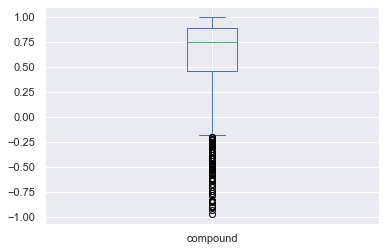

In [129]:
# Sometimes the best way to see is to plot. 
# In the data sampled here many of the values are 0
# There are less negative values than positive but the negative values are highly negative.

%matplotlib inline
import matplotlib.pyplot as plt

# The boxplot is a nice way to see how many values sit on the edges as outliers.
_plot = polarity_1.reset_index()['compound'].sort_values()
_plot.plot(kind='box')

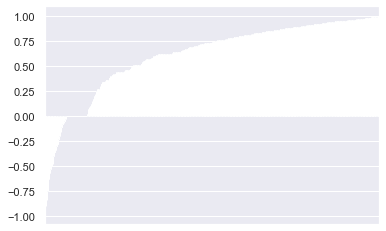

In [130]:
# Example of a barplot.
_plot = polarity_1.reset_index()['compound'].sort_values()
ax1 = plt.axes()
_plot.plot(kind='bar')

x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

plt.show()
plt.close()

array([[<AxesSubplot:title={'center':'compound'}>]], dtype=object)

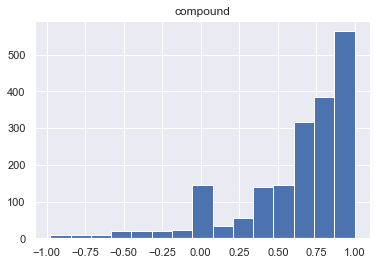

In [131]:
# You can also create a histogram:
polarity_1['compound'].sort_values().reset_index().hist(bins=15)

## Recommendations 

1. Use remuneration and spending scores to build customer segments and prioritise marketing dollars on the right segment (i.e. high remuneration, low spending scores)
2. Look into more data points of customer reviews, given the large proportion of neutral sentiments; deep-dive: negative comments & potential operational issues such as missing items and defects 
3. Pay attention to the sales in both NA and EU, with NA as a top priority

Thank you!